In [63]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('./Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./Data\Testing\glioma_tumor\image(1).jpg
./Data\Testing\glioma_tumor\image(10).jpg
./Data\Testing\glioma_tumor\image(100).jpg
./Data\Testing\glioma_tumor\image(11).jpg
./Data\Testing\glioma_tumor\image(12).jpg
./Data\Testing\glioma_tumor\image(13).jpg
./Data\Testing\glioma_tumor\image(14).jpg
./Data\Testing\glioma_tumor\image(15).jpg
./Data\Testing\glioma_tumor\image(16).jpg
./Data\Testing\glioma_tumor\image(17).jpg
./Data\Testing\glioma_tumor\image(18).jpg
./Data\Testing\glioma_tumor\image(19).jpg
./Data\Testing\glioma_tumor\image(2).jpg
./Data\Testing\glioma_tumor\image(20).jpg
./Data\Testing\glioma_tumor\image(21).jpg
./Data\Testing\glioma_tumor\image(22).jpg
./Data\Testing\glioma_tumor\image(23).jpg
./Data\Testing\glioma_tumor\image(24).jpg
./Data\Testing\glioma_tumor\image(25).jpg
./Data\Testing\glioma_tumor\image(26).jpg
./Data\Testing\glioma_tumor\image(27).jpg
./Data\Testing\glioma_tumor\image(28).jpg
./Data\Testing\glioma_tumor\image(29).jpg
./Data\Testing\glioma_tumor\image(3

./Data\Training\meningioma_tumor\m3 (143).jpg
./Data\Training\meningioma_tumor\m3 (145).jpg
./Data\Training\meningioma_tumor\m3 (146).jpg
./Data\Training\meningioma_tumor\m3 (147).jpg
./Data\Training\meningioma_tumor\m3 (148).jpg
./Data\Training\meningioma_tumor\m3 (149).jpg
./Data\Training\meningioma_tumor\m3 (15).jpg
./Data\Training\meningioma_tumor\m3 (150).jpg
./Data\Training\meningioma_tumor\m3 (151).jpg
./Data\Training\meningioma_tumor\m3 (152).jpg
./Data\Training\meningioma_tumor\m3 (153).jpg
./Data\Training\meningioma_tumor\m3 (154).jpg
./Data\Training\meningioma_tumor\m3 (155).jpg
./Data\Training\meningioma_tumor\m3 (156).jpg
./Data\Training\meningioma_tumor\m3 (157).jpg
./Data\Training\meningioma_tumor\m3 (158).jpg
./Data\Training\meningioma_tumor\m3 (159).jpg
./Data\Training\meningioma_tumor\m3 (16).jpg
./Data\Training\meningioma_tumor\m3 (160).jpg
./Data\Training\meningioma_tumor\m3 (161).jpg
./Data\Training\meningioma_tumor\m3 (162).jpg
./Data\Training\meningioma_tumor\m3 

In [2]:
#converting into nupy arrays 
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [3]:
#adding folder's images in python list
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('./Data','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./Data','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 167.09it/s]


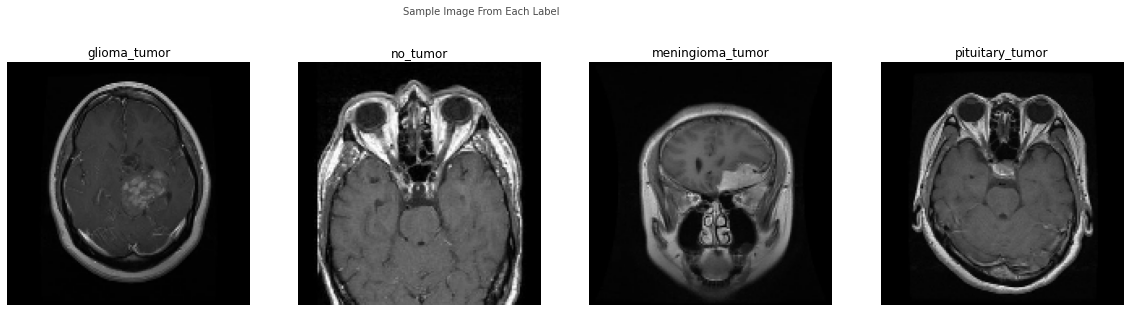

In [4]:
#visualizing the images
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',color="#1F1F1F",y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [5]:
#suffling  datasets of  X_train and y_train 
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [6]:
#checking the the data shapes of X_train
X_train.shape

(3264, 150, 150, 3)

In [7]:
#sppliting data sets int x_train ,, X_test, y_train, y_test
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [8]:
#performing one hot encoding to convert into numercial values
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [17]:
#transferring learning using EFFicientNetBO model
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [18]:
#using 2 layers i.e. GlobalAveragePooling2D, Dropout, Dense
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [19]:
#displaying summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 150, 150, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 150, 150, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 38, 38, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 38, 38, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 38, 38, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_b

 block3b_dwconv (DepthwiseConv2  (None, 19, 19, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 19, 19, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 19, 19, 240)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePoolin

 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
          

 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 10, 10, 480)  0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 10, 10, 112)  53760       ['block5a_se_excite[0][0]']      
          

                                                                                                  
 block5c_project_bn (BatchNorma  (None, 10, 10, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 10, 10, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 10, 10, 112)  0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 10, 10, 672)  75264       ['block5c_add[0][0]']            
          

                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 5, 5, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 5, 5, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 5, 5, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_d

 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 5, 5, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 5, 5, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 5, 5, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
          

In [20]:
#compiling the models
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [21]:
#using TensorBoard, ModelCheckpoint and ReduceLROnPlateau callback functions
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)

In [22]:
#using cnn to fit the model 
CNN = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.8157
Epoch 1: val_accuracy improved from -inf to 0.88776, saving model to effnet.h5
83/83 [==============================] - 151s 2s/step - loss: 0.4697 - accuracy: 0.8157 - val_loss: 0.4391 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.9330
Epoch 2: val_accuracy did not improve from 0.88776
83/83 [==============================] - 137s 2s/step - loss: 0.1931 - accuracy: 0.9330 - val_loss: 0.5545 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9667
Epoch 3: val_accuracy improved from 0.88776 to 0.92177, saving model to effnet.h5
83/83 [==============================] - 143s 2s/step - loss: 0.1124 - accuracy: 0.9667 - val_loss: 0.3042 - val_accuracy: 0.9218 - lr: 0.0010
Epoch 4/12
83/83 [==============================] - ETA: 0s - loss: 0.0975 - 

In [24]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(pred)

[3 2 0 1 3 2 2 3 2 2 2 0 0 1 2 3 3 2 3 2 3 0 1 1 1 3 0 3 3 2 2 3 0 2 3 2 3
 2 0 2 2 2 3 2 2 3 0 2 3 2 2 0 3 3 2 3 0 3 1 0 2 2 1 0 3 3 3 0 2 0 0 0 3 1
 0 2 0 0 2 1 2 2 3 3 0 0 2 2 2 1 1 3 2 2 0 2 0 2 3 2 2 0 0 2 1 3 3 0 0 2 1
 0 3 0 3 0 3 3 2 1 0 1 3 0 3 3 1 3 3 0 1 0 1 3 2 2 2 3 2 2 1 2 2 0 2 1 0 2
 2 2 3 1 2 3 2 3 1 1 2 0 3 2 1 2 0 0 0 1 0 0 2 3 3 1 2 1 0 0 3 0 3 0 1 0 3
 2 2 1 2 1 2 1 0 2 2 2 1 1 2 2 3 0 3 2 2 3 2 1 1 0 2 2 2 0 0 3 0 0 3 0 2 1
 3 1 3 0 1 1 3 2 0 0 3 0 0 2 3 3 0 0 3 0 2 2 0 0 2 1 0 2 0 0 2 0 0 0 3 1 3
 3 0 3 3 1 0 0 0 1 2 0 0 3 3 3 0 3 2 1 0 1 2 1 3 3 1 2 0 1 1 0 2 2 2 3 3 1
 3 0 0 3 0 3 1 2 3 2 3 3 0 0 3 1 2 3 2 0 3 2 3 3 2 0 0 2 0 0 3]


In [26]:
print(y_test_new)

[3 2 0 1 3 2 2 3 2 2 2 0 0 1 2 3 3 2 3 2 3 0 1 1 1 3 0 3 3 2 2 3 0 2 3 2 3
 2 0 2 2 2 3 2 2 3 0 2 3 0 2 0 3 3 2 3 0 3 1 0 2 2 1 0 3 3 3 0 2 0 0 0 3 1
 0 2 0 0 2 1 2 2 3 3 0 0 2 2 2 1 1 3 2 2 0 2 0 2 3 2 2 0 2 2 1 3 3 0 0 2 1
 0 3 0 3 0 3 3 2 1 0 1 3 0 3 3 1 3 3 0 1 0 1 3 2 0 2 3 2 2 1 2 2 0 2 1 0 2
 2 2 3 1 2 3 2 3 1 1 2 0 3 2 1 2 0 0 0 1 0 0 2 3 3 1 2 1 0 0 3 0 3 0 1 0 3
 2 2 1 2 1 2 1 0 2 2 2 1 1 2 2 3 0 3 2 2 3 2 1 1 2 2 2 2 0 0 3 0 0 3 0 2 1
 3 1 3 0 1 1 3 2 0 0 3 0 0 2 3 3 0 0 3 0 2 2 0 0 2 1 0 2 0 0 2 0 0 0 3 1 3
 3 0 3 3 1 0 0 0 1 2 0 0 3 3 3 0 3 2 1 0 1 2 1 3 3 1 2 0 1 1 0 2 0 2 3 3 2
 3 0 0 3 0 3 1 2 3 2 3 3 0 0 3 1 2 3 2 0 3 2 3 3 2 0 0 0 0 0 3]


In [27]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        93
           1       0.98      1.00      0.99        51
           2       0.96      0.97      0.96        96
           3       1.00      1.00      1.00        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



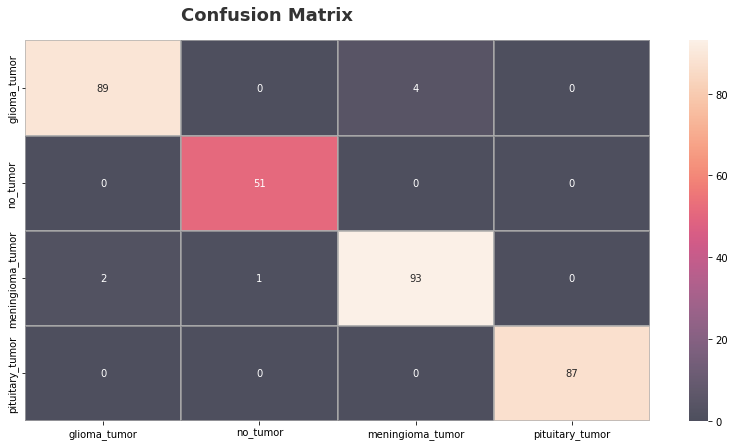

In [32]:
#visualtization of confustion matrix using heatmap
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2,linecolor="#AEAEAE")
fig.text(s='Confusion Matrix',size=18,fontweight='bold',y=0.92,x=0.28,alpha=0.8)

plt.show()

In [85]:
#predicting the brain tumor image using MRI scan
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [90]:
#making image uploader
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

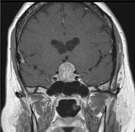

In [95]:
for name, file_info in uploader.value.items():
    img = Image.open(io.BytesIO(file_info['content']))
scale = 0.1
display(img.resize(( int(img.width * scale), int(img.height * scale))))

In [96]:
#after uploading image, predicting image type
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])